In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("loan.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
X = df.drop ( columns = ['Loan_ID','Loan_Status'] )
y = df ['Loan_Status']

In [6]:
numeric_features=X.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [7]:
categorical_features=X.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [8]:
y.value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# pipelines
numeric_transform=Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
])
categorical_transform=Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [11]:
X.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [12]:
preprocessor=ColumnTransformer( transformers=[
                ('num',numeric_transform,numeric_features),
                ('cat',categorical_transform,categorical_features)
                 ])

In [13]:
clf=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',SVC(kernel='linear'))
])

In [14]:
clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
score=clf.score(X_test,y_test)
print('accuracy',score)

accuracy 0.8536585365853658


In [16]:
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test,X_test_prediction)
test_data_accuracy

0.8536585365853658

In [17]:
cf=confusion_matrix(y_test,X_test_prediction)
cf

array([[21, 17],
       [ 1, 84]])

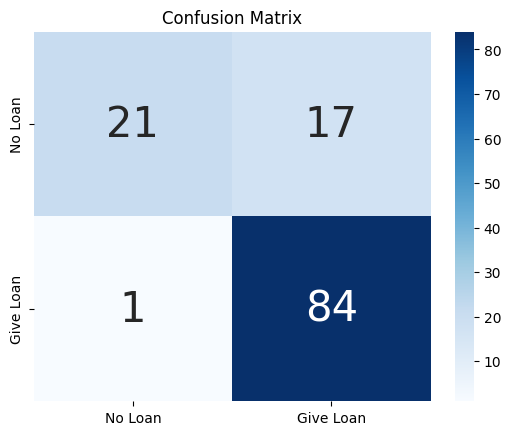

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.axes()#Creates an axis on which we can draw our plot
df_cm = cf
'''ax=ax: Specifies the axis on which to draw the heatmap'''
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", xticklabels=['No Loan','Give Loan'], yticklabels=['No Loan','Give Loan'],ax = ax )
ax.set_title('Confusion Matrix')
plt.show()